In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from six.moves import urllib
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc
from IPython.display import clear_output
from __future__ import absolute_import, division, print_function, unicode_literals

In [3]:
# Titanic dataset (code taken from official TensorFlow website)
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

In [4]:
dftrain.head()

survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y

In [5]:
dfeval.head()

survived     sex   age  n_siblings_spouses  parch     fare   class  \
0         0    male  35.0                   0      0   8.0500   Third   
1         0    male  54.0                   0      0  51.8625   First   
2         1  female  58.0                   0      0  26.5500   First   
3         1  female  55.0                   0      0  16.0000  Second   
4         1    male  34.0                   0      0  13.0000  Second   

      deck  embark_town alone  
0  unknown  Southampton     y  
1        E  Southampton     y  
2        C  Southampton     y  
3  unknown  Southampton     y  
4        D  Southampton     y

In [6]:
dftrain.shape

(627, 10)

In [7]:
dfeval.shape

(264, 10)

In [8]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [9]:
dftrain.describe()

survived         age  n_siblings_spouses       parch        fare
count  627.000000  627.000000          627.000000  627.000000  627.000000
mean     0.387560   29.631308            0.545455    0.379585   34.385399
std      0.487582   12.511818            1.151090    0.792999   54.597730
min      0.000000    0.750000            0.000000    0.000000    0.000000
25%      0.000000   23.000000            0.000000    0.000000    7.895800
50%      0.000000   28.000000            0.000000    0.000000   15.045800
75%      1.000000   35.000000            1.000000    0.000000   31.387500
max      1.000000   80.000000            8.000000    5.000000  512.329200

In [10]:
dftrain.count()

survived              627
sex                   627
age                   627
n_siblings_spouses    627
parch                 627
fare                  627
class                 627
deck                  627
embark_town           627
alone                 627
dtype: int64

In [11]:
dftrain.isnull().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [12]:
y_train=dftrain.pop('survived')#The one who survived
y_eval=dfeval.pop('survived')#The one who survived
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [18]:
print(dftrain.loc[0], y_train.loc[0])

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


In [20]:
dftrain.head()# Survived column is removed

sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y

In [21]:
dftrain.shape

(627, 9)

<Axes: >

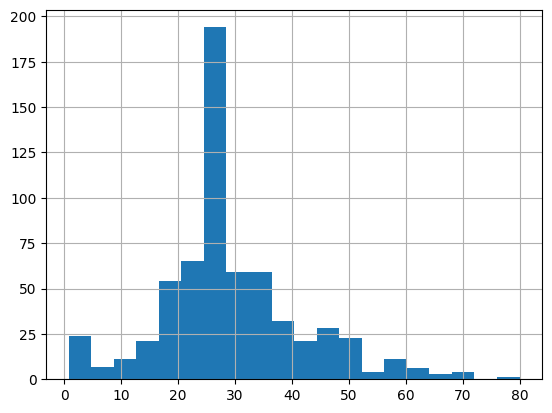

In [23]:
dftrain.age.hist(bins=20)

<Axes: ylabel='sex'>

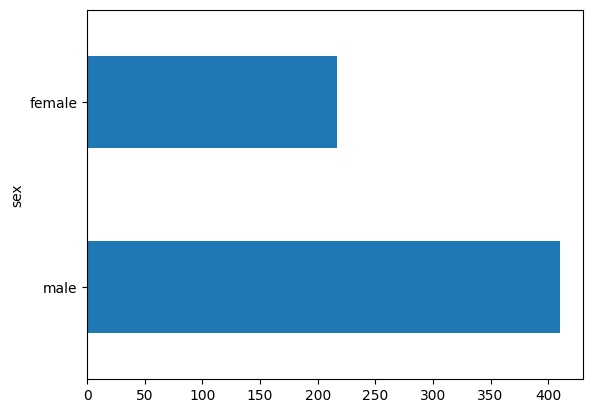

In [22]:
dftrain.sex.value_counts().plot(kind='barh')

<Axes: ylabel='class'>

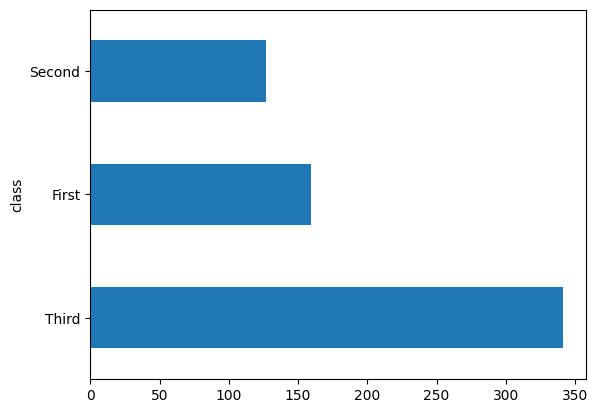

In [24]:
dftrain['class'].value_counts().plot(kind='barh')

<Axes: ylabel='deck'>

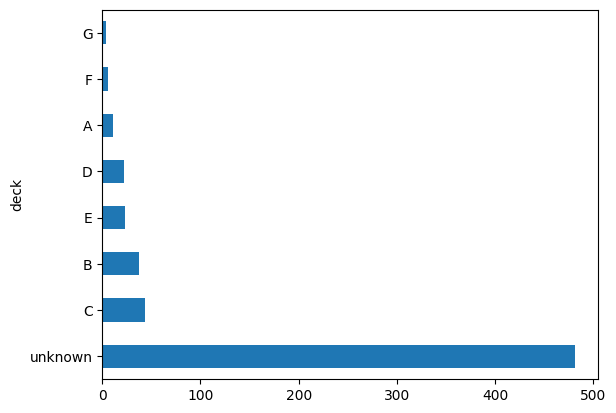

In [25]:
dftrain['deck'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survived')

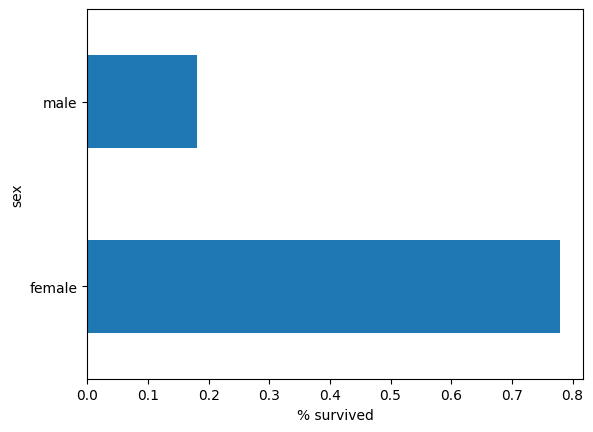

In [27]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survived')